In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h7_double-experience' in 'loot-box' for 3000 rounds from scratch.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [5]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [6]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -0.8   -0.6   -0.6   -0.6   -0.6   -0.6]     94 [     9    17     7    39    12    10]
 1  [0 0 0 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0   -0.1]      1 [     0     0     0     0     0     1]
 2  [0 0 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 3  [0 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -0.5   -0.5   -0.5   -0.3   -0.5   -0.4]     49 [     4     7     5    15    14     4]
 6  [0 0 1 2] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 7  [0 1 1 2] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0  

In [7]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 1  [0 0 0 1] [1]  0  [    0.0   -0.1    0.0    0.0   -0.1   -0.2]      3 [     0     1     0     0     1     1]
 2  [0 0 1 1] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 3  [0 1 1 1] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 4  [1 1 1 1] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [1]  3  [   -1.2   -0.9   -1.6   -0.8   -0.8   -1.3]    132 [     6     8    13    25    65    15]
 6  [0 0 1 2] [1]  4  [   -1.5   -1.3   -0.9   -1.1   -0.9   -1.2]  883569 [    18    12    10    35 883483    11]
 7  [0 1 1 2] [1]  1  [   -0.2    0.0   -0.2    0.0   -0.2   -0.1]      4 [     1     0

In [8]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  0  [    0.0    0.0    0.0   -0.1    0.0   -0.3]      3 [     0     0     0     2     0     1]
 1  [0 0 0 1] [2]  4  [   -1.4   -1.6   -1.4   -0.9   -0.8   -1.0]  296498 [    13    16    12    26 296412    19]
 2  [0 0 1 1] [2]  5  [   -1.3   -1.3   -0.7   -0.7   -0.7   -0.7]    123 [    14    10    17    43    26    13]
 3  [0 1 1 1] [2]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 4  [1 1 1 1] [2]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [2]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 6  [0 0 1 2] [2]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 7  [0 1 1 2] [2]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0

## Looking at the training process

### Training performance over rounds

In [9]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [10]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [11]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [12]:
coin_speed = collected_coins / round_lengths


survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [13]:
avg_length   = 50   # number of rounds to average over

rounds_avg = rounds[avg_length-1:]

coin_speed_rate     = moving_average(coin_speed, avg_length)
coin_count_rate     = moving_average(collected_coins, avg_length)
kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


/var/folders/43/7lbyzcz55dz1yrwzhvb9dk9c0000gn/T/ipykernel_94235/2773437991.py:7: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim((0, 1.1*max(coin_speed)))
/var/folders/43/7lbyzcz55dz1yrwzhvb9dk9c0000gn/T/ipykernel_94235/2773437991.py:15: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim((0, 1.1*max(collected_coins)))


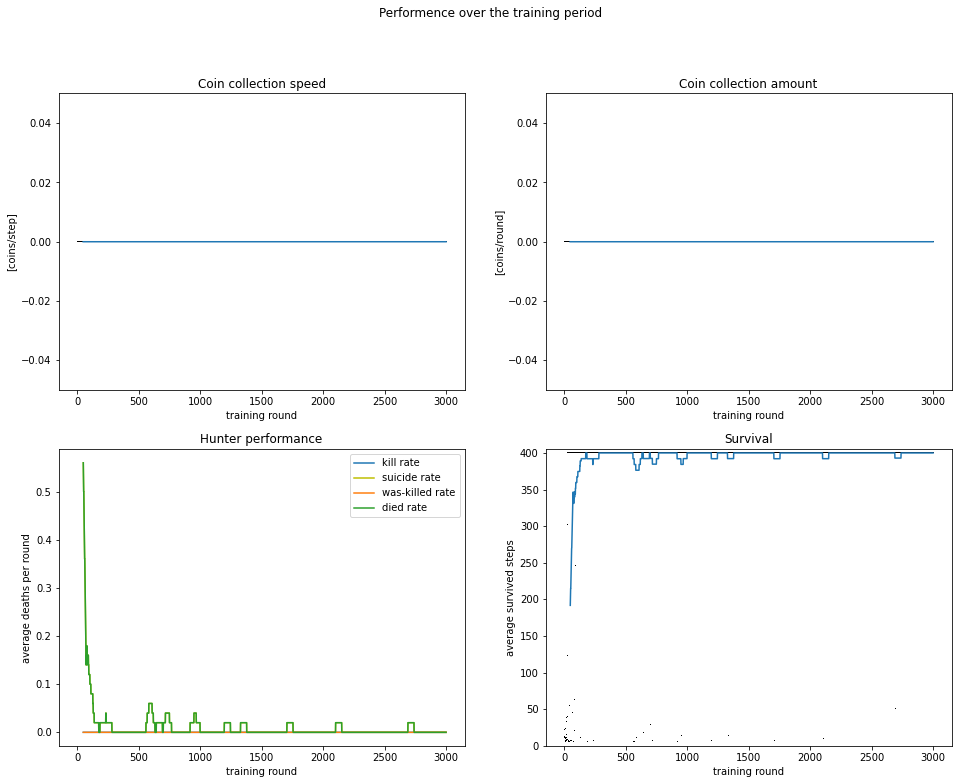

In [14]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
plt.plot(rounds, coin_speed, ',k')
plt.plot(rounds_avg, coin_speed_rate)
plt.ylim((0, 1.1*max(coin_speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/step]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.plot(rounds_avg, coin_count_rate)
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amount")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds_avg, kill_rate, label = "kill rate")
plt.plot(rounds_avg, suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds_avg, was_killed_rate, label = "was-killed rate")
plt.plot(rounds_avg, died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds_avg, steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()




In [15]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [16]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

ValueError: x and y must have same first dimension, but have shapes (3000,) and (30, 6)

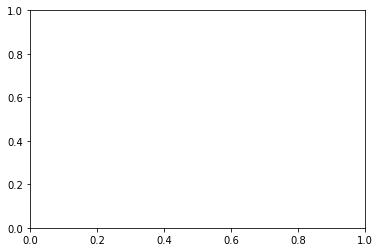

In [18]:
analyze_action()

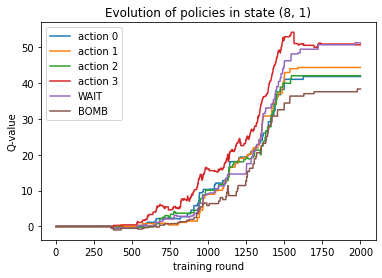

In [ ]:
analyze_state((8, 1))

In [ ]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -6.4   -6.4   -6.3   -6.2   -6.2   -6.3]   2002 [   166   148   181   134  1243   130]
 1  [0 0 0 1] [0]  3  [   -3.9   -5.2   -4.6   44.3   -4.1   -6.0]   1690 [    35    58    35  1471    43    48]
 2  [0 0 1 1] [0]  2  [    0.0    0.0   49.5   -0.6   -0.9   -0.5]    277 [     4     3   260     1     8     1]
 3  [0 1 1 1] [0]  1  [   -0.5    5.0    0.0    0.0    0.0    0.0]      3 [     1     1     0     0     1     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -6.8   -6.8   -6.8   44.8   -6.0   -6.8]   4472 [   103    91    99  3996   105    78]
 6  [0 0 1 2] [0]  3  [   -3.3   -3.7   -1.1   48.2   -1.1   -2.1]    571 [    21    10    14   509     9     8]
 7  [0 1 1 2] [0]  3  [    0.0    1.1    0.0   42.1    0.0    0.0]     43 [     1     1  